In [26]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load datasets
deliveries = pd.read_csv("cleaned_deliveries.csv")
matches = pd.read_csv("cleaned_matches.csv")

# Step 3: Clean column names (important!)
deliveries.columns = deliveries.columns.str.strip().str.lower()
matches.columns = matches.columns.str.strip().str.lower()

print("Deliveries Columns:", deliveries.columns.tolist())
print("Matches Columns:", matches.columns.tolist())

# 🏏 BATTING ANALYSIS
batting_stats = deliveries.groupby("batter").agg(
    matches=("match_id", "nunique"),
    innings=("inning", "count"),
    runs=("batsman_runs", "sum"),
    balls=("ball", "count"),
    fours=("batsman_runs", lambda x: (x == 4).sum()),
    sixes=("batsman_runs", lambda x: (x == 6).sum()),
    outs=("player_dismissed", lambda x: (x.str.lower() != "na").sum())
).reset_index()

# Calculate batting metrics
batting_stats["strike_rate"] = (batting_stats["runs"] / batting_stats["balls"]) * 100
batting_stats["average"] = batting_stats["runs"] / batting_stats["outs"].replace(0, 1)

# Sort by most runs
batting_stats = batting_stats.sort_values(by="runs", ascending=False)

# 🎯 BOWLING ANALYSIS
bowling_stats = deliveries.groupby("bowler").agg(
    matches=("match_id", "nunique"),
    balls=("ball", "count"),
    runs_conceded=("total_runs", "sum"),
    wickets=("player_dismissed", lambda x: (x.str.lower() != "na").sum())
).reset_index()

# Calculate bowling metrics
bowling_stats["overs"] = bowling_stats["balls"] // 6
bowling_stats["economy"] = bowling_stats["runs_conceded"] / bowling_stats["overs"].replace(0, 1)
bowling_stats["average"] = bowling_stats["runs_conceded"] / bowling_stats["wickets"].replace(0, 1)
bowling_stats["strike_rate"] = bowling_stats["balls"] / bowling_stats["wickets"].replace(0, 1)

# Sort by most wickets
bowling_stats = bowling_stats.sort_values(by="wickets", ascending=False)

# 📌 Display results
print("\n🏏 Top 10 Batters")
display(batting_stats.head(10))

print("\n🎯 Top 10 Bowlers")
display(bowling_stats.head(10))

# 💾 Export results to CSV
batting_stats.to_csv("all_players_batting_stats.csv", index=False)
bowling_stats.to_csv("all_players_bowling_stats.csv", index=False)

print("\n✅ Batting & Bowling stats saved as CSV files.")


Deliveries Columns: ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'is_super_over', 'strike_rate', 'economy']
Matches Columns: ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2', 'year', 'match_result']

🏏 Top 10 Batters


,batter,matches,innings,runs,balls,fours,sixes,outs,strike_rate,average
631,V Kohli,244,6236,8014,6236,708,273,6236,128.511867,1.285119
512,S Dhawan,221,5483,6769,5483,768,153,5483,123.454313,1.234543
477,RG Sharma,251,5183,6630,5183,599,281,5183,127.918194,1.279182
147,DA Warner,184,4849,6567,4849,663,236,4849,135.429986,1.354300
546,SK Raina,200,4177,5536,4177,506,204,4177,132.535312,1.325353
374,MS Dhoni,228,3947,5243,3947,363,252,3947,132.835065,1.328351
30,AB de Villiers,170,3487,5181,3487,414,253,3487,148.580442,1.485804
124,CH Gayle,141,3516,4997,3516,408,359,3516,142.121729,1.421217
501,RV Uthappa,197,3927,4954,3927,481,182,3927,126.152279,1.261523
282,KD Karthik,233,3687,4843,3687,466,161,3687,131.353404,1.313534



🎯 Top 10 Bowlers


,bowler,matches,balls,runs_conceded,wickets,overs,economy,average,strike_rate
355,R Ashwin,208,4679,5435,4679,779,6.976893,1.161573,1.0
446,SP Narine,175,4146,4672,4146,691,6.761216,1.126869,1.0
71,B Kumar,176,4060,5051,4060,676,7.471893,1.244089,1.0
348,PP Chawla,191,3895,5179,3895,649,7.979969,1.329653,1.0
373,RA Jadeja,211,3895,4917,3895,649,7.576271,1.262388,1.0
524,YS Chahal,159,3628,4681,3628,604,7.750000,1.290243,1.0
163,Harbhajan Singh,160,3496,4101,3496,582,7.046392,1.173055,1.0
8,A Mishra,162,3444,4193,3444,574,7.304878,1.217480,1.0
119,DJ Bravo,158,3296,4436,3296,549,8.080146,1.345874,1.0
494,UT Yadav,147,3190,4442,3190,531,8.365348,1.392476,1.0



✅ Batting & Bowling stats saved as CSV files.


C:\Users\simar\AppData\Local\Temp\ipykernel_13096\3898794089.py:14: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\simar\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


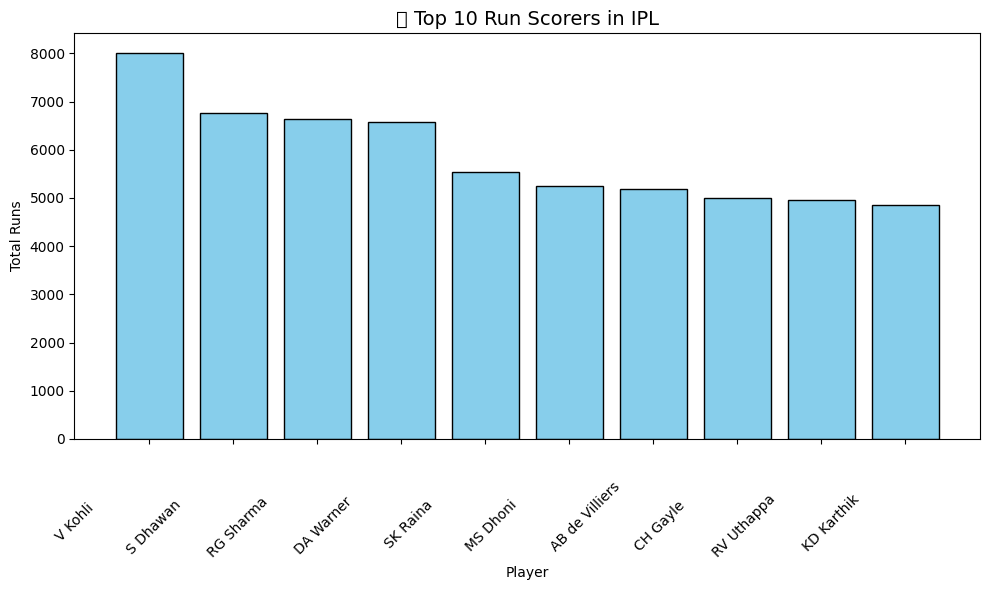

C:\Users\simar\AppData\Local\Temp\ipykernel_13096\3898794089.py:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\simar\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


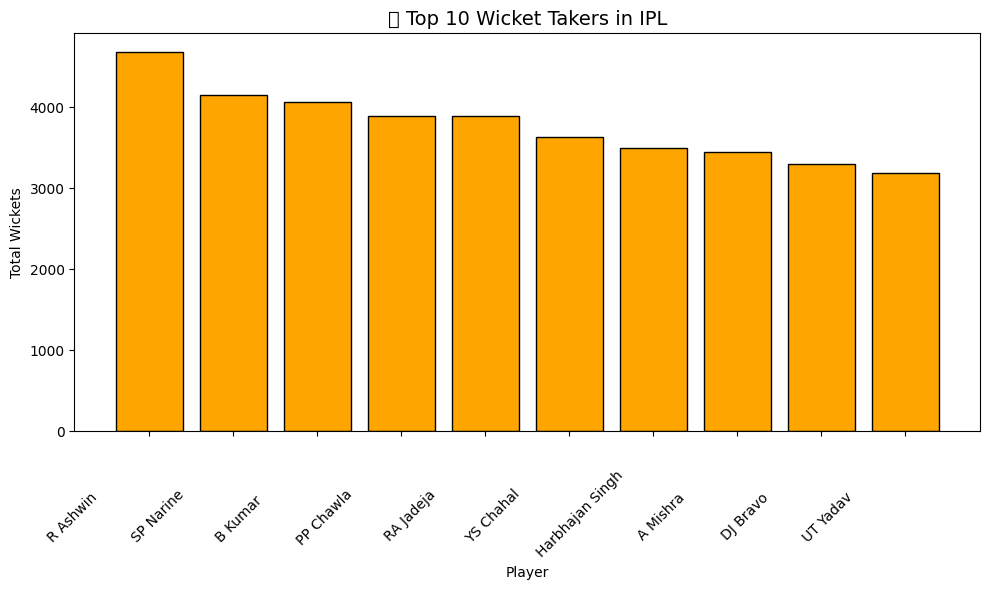

In [27]:
import matplotlib.pyplot as plt

# 📊 Top 10 Run Scorers
top_batters = batting_stats.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_batters["batter"], top_batters["runs"], color="skyblue", edgecolor="black")
plt.title("🏏 Top 10 Run Scorers in IPL", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Total Runs")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 📊 Top 10 Wicket Takers
top_bowlers = bowling_stats.head(10)

plt.figure(figsize=(10,6))
plt.bar(top_bowlers["bowler"], top_bowlers["wickets"], color="orange", edgecolor="black")
plt.title("🎯 Top 10 Wicket Takers in IPL", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Total Wickets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


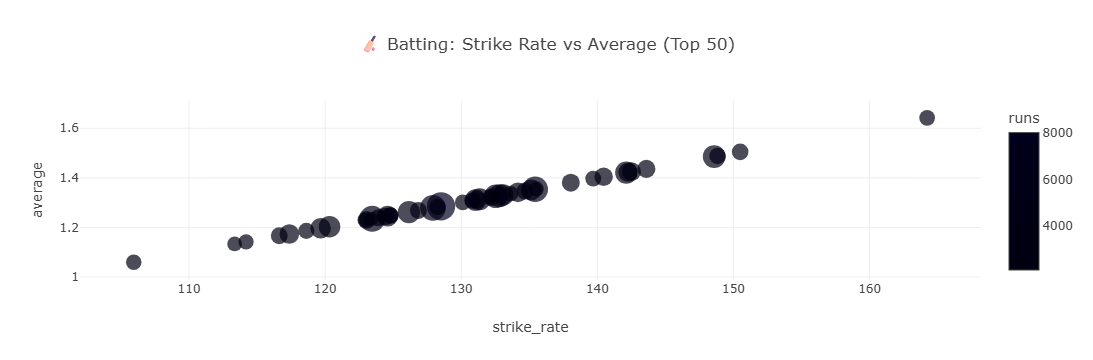

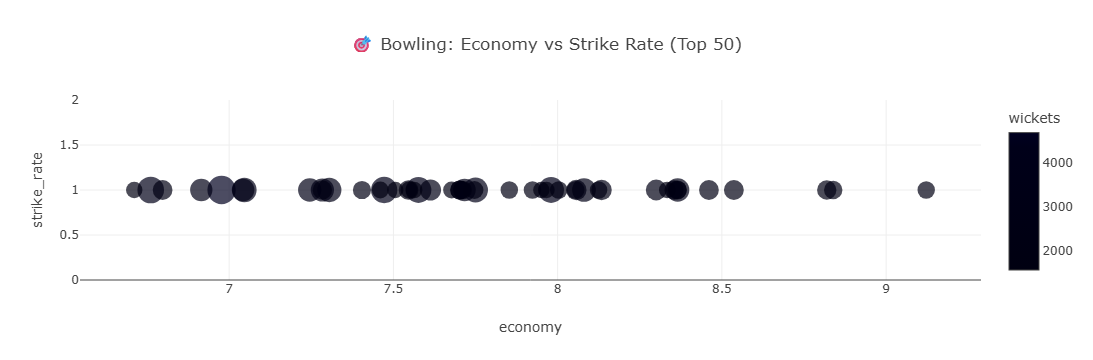

In [32]:
import plotly.express as px

# Interactive Batting Plot
fig = px.scatter(
    top_batters_50,
    x="strike_rate",
    y="average",
    size="runs",
    color="runs",
    hover_name="batter",
    title="🏏 Batting: Strike Rate vs Average (Top 50)"
)
fig.show()

# Interactive Bowling Plot
fig = px.scatter(
    top_bowlers_50,
    x="economy",
    y="strike_rate",
    size="wickets",
    color="wickets",
    hover_name="bowler",
    title="🎯 Bowling: Economy vs Strike Rate (Top 50)"
)
fig.show()
